In [1]:
import pandas as pd
import re
from collections import Counter

In [2]:
# Загрузка данных

import file_loader as fl

file_path = 'scotch_review2020.csv'
df = fl.load_data(file_path)

print(df.info)

Данные успешно загружены. Размер: (2247, 7)
<bound method DataFrame.info of         id                                               name  \
0        1      Black Bowmore 42 year old 1964 vintage, 40.5%   
1        2        Bowmore 46 year old (distilled 1964), 42.9%   
2        3                     Johnnie Walker Blue Label, 40%   
3        4    Glenlivet Cellar Collection 1969 vintage, 50.8%   
4        5  The Macallan 29 year old 1976 Vintage (Cask #1...   
...    ...                                                ...   
2242  2243    BenRiach Sauternes Wood Finish 16 year old, 46%   
2243  2244                          The Macallan Whisky Maker   
2244  2245  Arran St. Emilion Wine Cask Finish (Limited Ed...   
2245  2246                                 Smoking Ember, 40%   
2246  2247                     Teaninich, 1996 vintage, 55.3%   

                   category  review.point  price currency  \
0        Single Malt Scotch            97   4500        $   
1        Single Malt 

In [3]:
# Поиск повторяющихся тезисов в описании для генерации новых столбцов

import word_finder as wf

finder = wf.finder(df)

Первые 5 строк с повторяющимися словами:
ID 1: what, this, whisky, the, and, palate
ID 2: there, the, and
ID 3: and, caramels, smoke, seeds
ID 4: glenlivet, the, cellar, collection, this, and, whisky, for
ID 5: macallan, with, and

Количество записей с повторяющимися словами: 2244 из 2247
Процент записей с повторяющимися словами: 99.9%

100 самых частых повторяющихся слов:
  and: 2137 раз
  the: 1931 раз
  with: 1293 раз
  this: 294 раз
  sherry: 230 раз
  oak: 224 раз
  smoke: 198 раз
  whisky: 172 раз
  chocolate: 160 раз
  peat: 154 раз
  notes: 145 раз
  sweet: 119 раз
  vanilla: 118 раз
  for: 116 раз
  fruit: 109 раз
  old: 107 раз
  but: 102 раз
  that: 101 раз
  malt: 89 раз
  more: 89 раз
  orange: 85 раз
  from: 74 раз
  year: 73 раз
  honey: 72 раз
  very: 72 раз
  casks: 67 раз
  fruits: 63 раз
  its: 61 раз
  there: 58 раз
  has: 58 раз
  cask: 57 раз
  toffee: 57 раз
  spices: 56 раз
  lemon: 52 раз
  palate: 49 раз
  spicy: 48 раз
  dark: 47 раз
  you: 47 раз
  are: 46 р

In [4]:
# Генерация новых столбцов

df = df.rename(columns={'description.1.2247.': 'description'})

# Список слов для поиска и создания столбцов
selected_words = [
    'smoke', 'peat', 'sherry', 'vanilla', 'fruit', 'sweet', 'orange', 'fruits', 'toffee',
    'spices', 'palate', 'spicy', 'pepper', 'apple', 'ginger', 'citrus', 'wood', 'caramel',
    'smoky', 'fruity', 'spice', 'oak', 'caramel', 'honey', 'chocolate']

import corrector as cor

word_changes = cor.word_changer(df, selected_words)

#Удаляем лишние столбцы
df = df.drop(['id', 'currency', 'description', 'repeated_words'], axis=1)

df['price'] = df['price'].str.replace(',', '', regex=True)

df, changed = cor.interactive_price_corrector_direct(df, 'price')

print(df.head)

Статистика по найденным словам:
smoke: 584 записей (26.0%)
peat: 430 записей (19.1%)
sherry: 545 записей (24.3%)
vanilla: 862 записей (38.4%)
fruit: 707 записей (31.5%)
sweet: 722 записей (32.1%)
orange: 443 записей (19.7%)
fruits: 481 записей (21.4%)
toffee: 487 записей (21.7%)
spices: 422 записей (18.8%)
palate: 1331 записей (59.2%)
spicy: 435 записей (19.4%)
pepper: 413 записей (18.4%)
apple: 234 записей (10.4%)
ginger: 414 записей (18.4%)
citrus: 345 записей (15.4%)
wood: 243 записей (10.8%)
caramel: 353 записей (15.7%)
smoky: 201 записей (8.9%)
fruity: 239 записей (10.6%)
spice: 458 записей (20.4%)
oak: 837 записей (37.2%)
caramel: 353 записей (15.7%)
honey: 493 записей (21.9%)
chocolate: 684 записей (30.4%)

Общее количество записей: 2247

Первые 5 строк с новыми столбцами:
                                                name  has_smoke  has_peat  \
0      Black Bowmore 42 year old 1964 vintage, 40.5%          1         0   
1        Bowmore 46 year old (distilled 1964), 42.9%   

,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
33,"The Balvenie 1973 43 year old, 46.6%",Single Malt Scotch,95,15000 or $60000/set,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Введите правильное числовое значение (или Enter чтобы пропустить): 15000
Заменено 1 значений: '15000 or $60000/set' → 15000.0

Проблемное значение 2/10: '150/375ml.'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
92,"Dewar’s 32 year old Double Double, 46%",Blended Scotch Whisky,94,150/375ml.,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0


Введите правильное числовое значение (или Enter чтобы пропустить): 280
Заменено 1 значений: '150/375ml.' → 280.0

Проблемное значение 3/10: '50/375ml.'
Встречается 2 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
94,"Dewar’s 21 year old Double Double, 46%",Blended Scotch Whisky,94,50/375ml.,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
359,"Dewar’s 21 year old Double Double, 46%",Blended Scotch Whisky,92,50/375ml.,0,0,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0


Введите правильное числовое значение (или Enter чтобы пропустить): 93.33
Заменено 2 значений: '50/375ml.' → 93.33

Проблемное значение 4/10: '60000/set'
Встречается 4 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
186,"The Balvenie 1961 55 year old, 41.7%",Single Malt Scotch,93,60000/set,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739,"The Balvenie 1981 35 year old, 43.8%",Single Malt Scotch,90,60000/set,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Введите правильное числовое значение (или Enter чтобы пропустить): 15000
Заменено 4 значений: '60000/set' → 15000.0

Проблемное значение 5/10: '100/375ml.'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
778,"Dewar’s 27 year old Double Double, 46%",Blended Scotch Whisky,90,100/375ml.,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Введите правильное числовое значение (или Enter чтобы пропустить): 186.67
Заменено 1 значений: '100/375ml.' → 186.67

Проблемное значение 6/10: '44/liter'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
1010,Johnnie Walker Blenders’ Batch Sherry Cask Fin...,Blended Scotch Whisky,89,44/liter,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


Введите правильное числовое значение (или Enter чтобы пропустить): 30.8
Заменено 1 значений: '44/liter' → 30.8

Проблемное значение 7/10: '132/700ml.'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
1280,"John Walker & Sons XR 21 year old, 40%",Blended Scotch Whisky,88,132/700ml.,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,1


Введите правильное числовое значение (или Enter чтобы пропустить): 132
Заменено 1 значений: '132/700ml.' → 132.0

Проблемное значение 8/10: '39/1.75 liter'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
1825,"Kirkland 12 year old, 40%",Blended Scotch Whisky,86,39/1.75 liter,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,1


Введите правильное числовое значение (или Enter чтобы пропустить): 15.6
Заменено 1 значений: '39/1.75 liter' → 15.6

Проблемное значение 9/10: '35/liter'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
2027,"The Street Pumas’, 40%",Blended Scotch Whisky,85,35/liter,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1


Введите правильное числовое значение (или Enter чтобы пропустить): 24.5
Заменено 1 значений: '35/liter' → 24.5

Проблемное значение 10/10: '18/1.75 liter'
Встречается 1 раз


,name,category,review.point,price,has_smoke,has_peat,has_sherry,has_vanilla,has_fruit,has_sweet,...,has_ginger,has_citrus,has_wood,has_caramel,has_smoky,has_fruity,has_spice,has_oak,has_honey,has_chocolate
2200,"Kirkland, 40%",Blended Scotch Whisky,84,18/1.75 liter,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Введите правильное числовое значение (или Enter чтобы пропустить): 7.2
Заменено 1 значений: '18/1.75 liter' → 7.2

Преобразуем столбец в числовой формат...

РЕЗУЛЬТАТЫ:
Исходно нечисловых значений: 14
Изменено значений: 14
Пропущено значений: 0
Успешно преобразовано: 2247/2247
Тип данных столбца теперь: float64
<bound method NDFrame.head of                                                    name  \
0         Black Bowmore 42 year old 1964 vintage, 40.5%   
1           Bowmore 46 year old (distilled 1964), 42.9%   
2                        Johnnie Walker Blue Label, 40%   
3       Glenlivet Cellar Collection 1969 vintage, 50.8%   
4     The Macallan 29 year old 1976 Vintage (Cask #1...   
...                                                 ...   
2242    BenRiach Sauternes Wood Finish 16 year old, 46%   
2243                          The Macallan Whisky Maker   
2244  Arran St. Emilion Wine Cask Finish (Limited Ed...   
2245                                 Smoking Ember, 40%   
2246    

In [5]:
# Сохраняем результат
df.to_csv('scotch_review_corrected.csv', index=False)

In [1]:
import file_loader as fl

file_path = 'scotch_review_corrected.csv'
df = fl.load_data(file_path)

print(df.info)

Данные успешно загружены. Размер: (2247, 28)
<bound method DataFrame.info of                                                    name  \
0         Black Bowmore 42 year old 1964 vintage, 40.5%   
1           Bowmore 46 year old (distilled 1964), 42.9%   
2                        Johnnie Walker Blue Label, 40%   
3       Glenlivet Cellar Collection 1969 vintage, 50.8%   
4     The Macallan 29 year old 1976 Vintage (Cask #1...   
...                                                 ...   
2242    BenRiach Sauternes Wood Finish 16 year old, 46%   
2243                          The Macallan Whisky Maker   
2244  Arran St. Emilion Wine Cask Finish (Limited Ed...   
2245                                 Smoking Ember, 40%   
2246                     Teaninich, 1996 vintage, 55.3%   

                   category  review.point    price  has_smoke  has_peat  \
0        Single Malt Scotch            97   4500.0          1         0   
1        Single Malt Scotch            97  13500.0          1   


=== КАТЕГОРИИ ВИСКИ ===
Single Malt Scotch: 1835 (81.7%)
Blended Scotch Whisky: 247 (11.0%)
Blended Malt Scotch Whisky: 165 (7.3%)


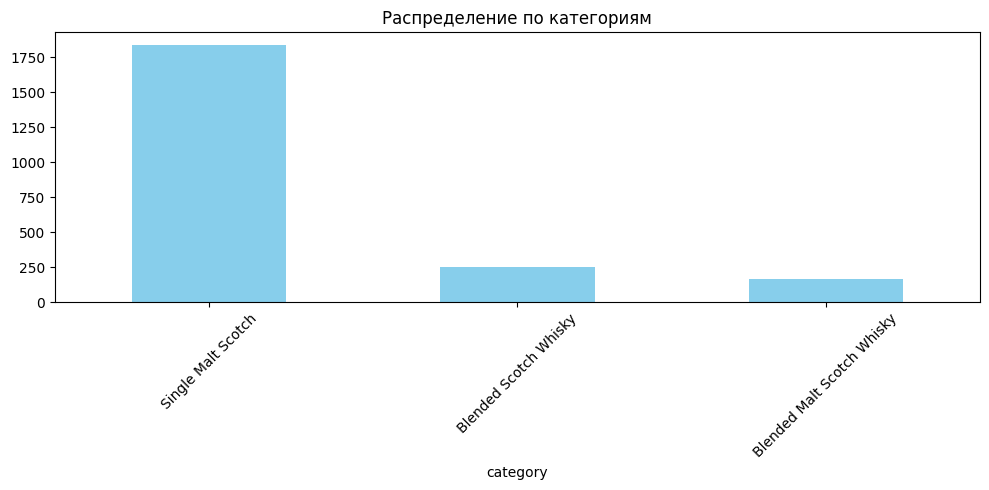


=== АНАЛИЗ ОЦЕНОК ===
Среднее: 88.48
Медиана: 88.00
Стандартное отклонение: 2.95
Диапазон: 83 - 97


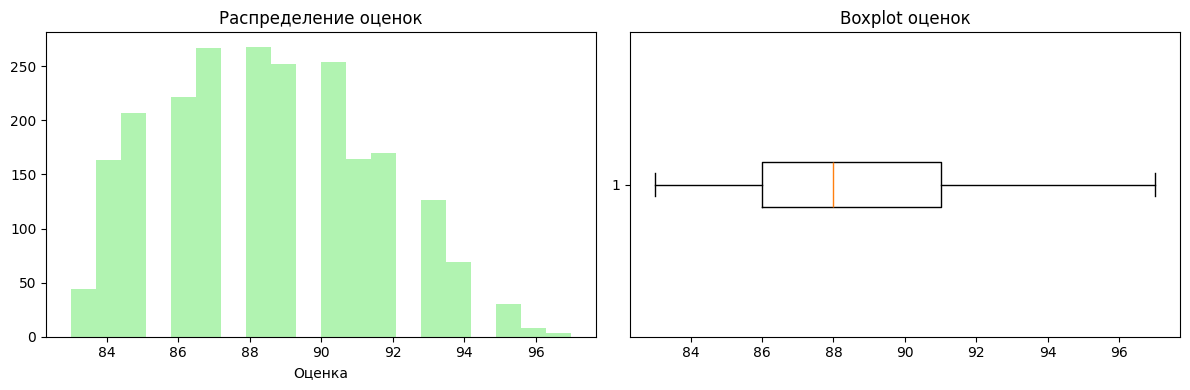


=== АНАЛИЗ ЦЕН ===
Средняя цена: $721.94
Медианная цена: $111.00
Самая дорогая: $157000.00
Самая дешевая: $7.20

Топ-5 самых дорогих:
  Diamond Jubilee by John Walker & Sons, 42.5%
    Цена: $157000.00, Оценка: 93
  The Dalmore 50 year old, 40%
    Цена: $60000.00, Оценка: 93
  Bowmore 50 year old 1966 vintage, 41.5%
    Цена: $30000.00, Оценка: 94
  Balvenie 1971 vintage, 49.9%
    Цена: $27747.00, Оценка: 94
  The Balvenie DCS Compendium 1st Chapter 1968 46 ye...
    Цена: $27620.00, Оценка: 90

=== ВКУСОВЫЕ ПРОФИЛИ ===
Самые популярные вкусы:
  palate: 1331 (59.2%)
  vanilla: 862 (38.4%)
  oak: 837 (37.2%)
  sweet: 722 (32.1%)
  fruit: 707 (31.5%)
  chocolate: 684 (30.4%)
  smoke: 584 (26.0%)
  sherry: 545 (24.3%)


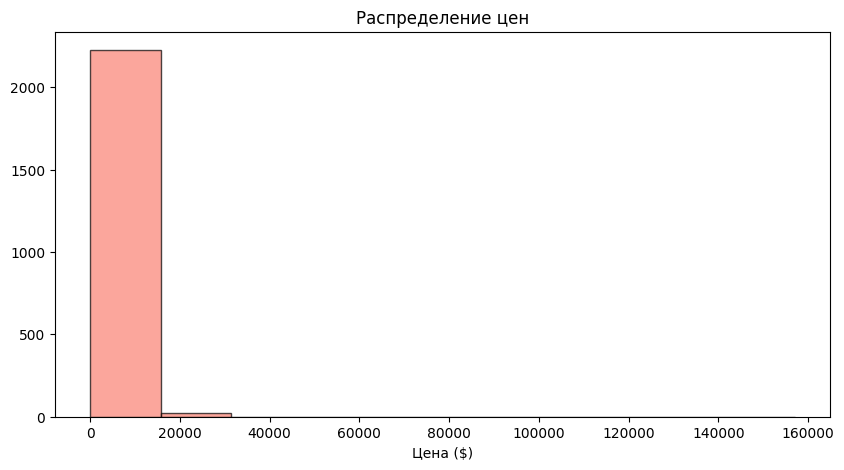

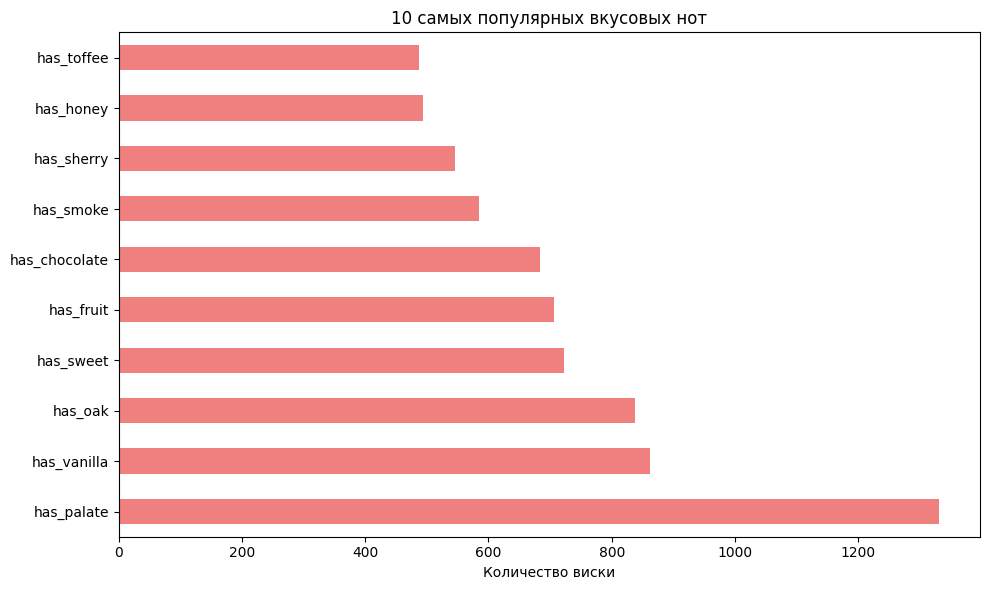


=== Цена - Рейтинг ===
Корреляция цена-оценка: 0.152

Топ-5 по соотношению цена/качество (только для анализа):
  Kirkland, 40%
    Цена: $7.20, Оценка: 84
  Clan MacGregor, 40%
    Цена: $10.00, Оценка: 85
  Carlyle, 40%
    Цена: $13.00, Оценка: 88
  MacQueens of Scotland 3 year old, 40%
    Цена: $13.00, Оценка: 84
  Kirkland 12 year old, 40%
    Цена: $15.60, Оценка: 86


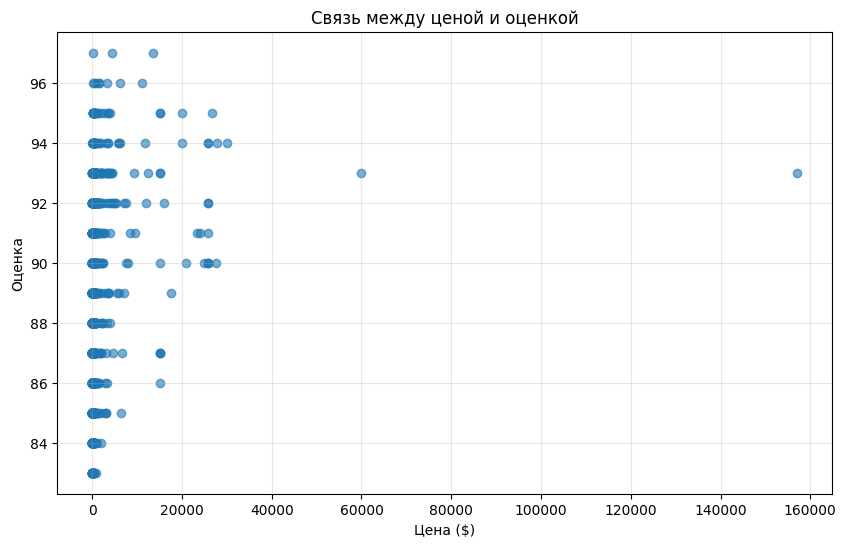

In [2]:
import EDA as eda

analize = eda.whisky_eda(df)



In [3]:
import preparation as prep

X_train, X_test, y_train, y_test, feature_columns, scaler, label_encoder_y, X_train_indices = prep.prepare_data(df)



Кодирование классов: {'High': np.int64(0), 'Low': np.int64(1)}
Используемые признаки: 26
Размер train: (1797, 26)
Размер test: (450, 26)


_____Extra Trees:_____
  Accuracy = 0.9533
  Precision = 0.9532
  Recall = 1.0000
  F1-Score = 0.9761
  ROC-AUC = 0.7541

_____Random Forest:_____
  Accuracy = 0.9511
  Precision = 0.9511
  Recall = 1.0000
  F1-Score = 0.9749
  ROC-AUC = 0.7695

_____LDA:_____
  Accuracy = 0.9511
  Precision = 0.9511
  Recall = 1.0000
  F1-Score = 0.9749
  ROC-AUC = 0.6458

_____XGBoost:_____
  Accuracy = 0.9489
  Precision = 0.9551
  Recall = 0.9930
  F1-Score = 0.9737
  ROC-AUC = 0.6626

_____Logistic Regression:_____
  Accuracy = 0.9511
  Precision = 0.9511
  Recall = 1.0000
  F1-Score = 0.9749
  ROC-AUC = 0.5597

_____АНСАМБЛЬ:_____
  Accuracy = 0.9511
  Precision = 0.9511
  Recall = 1.0000
  F1-Score = 0.9749
  ROC-AUC = 0.7596


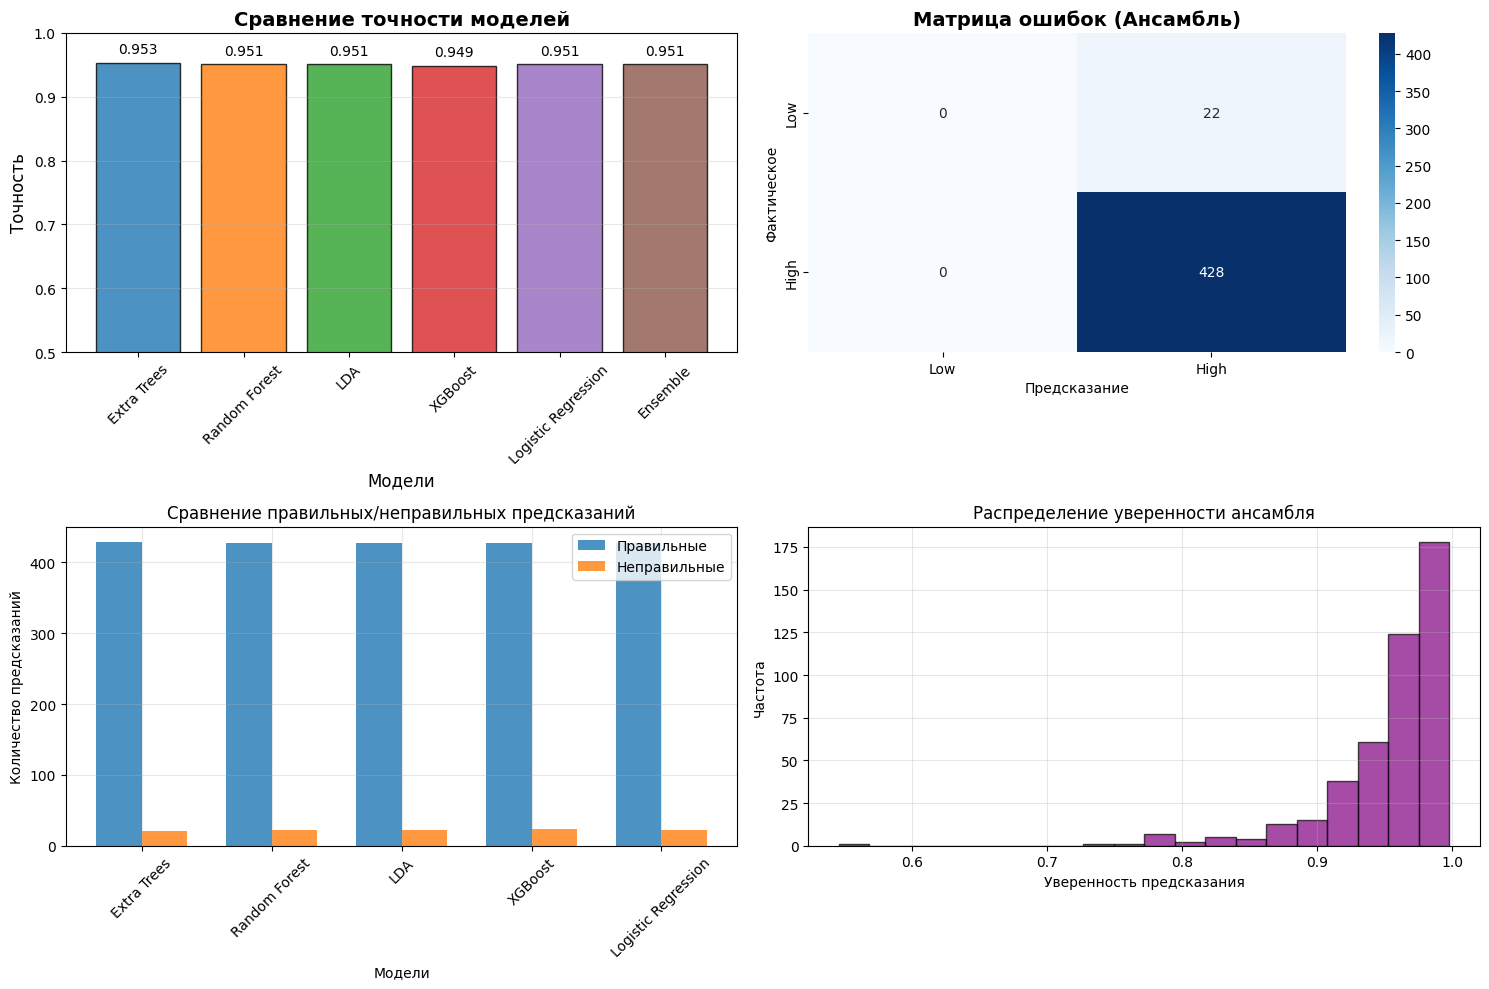

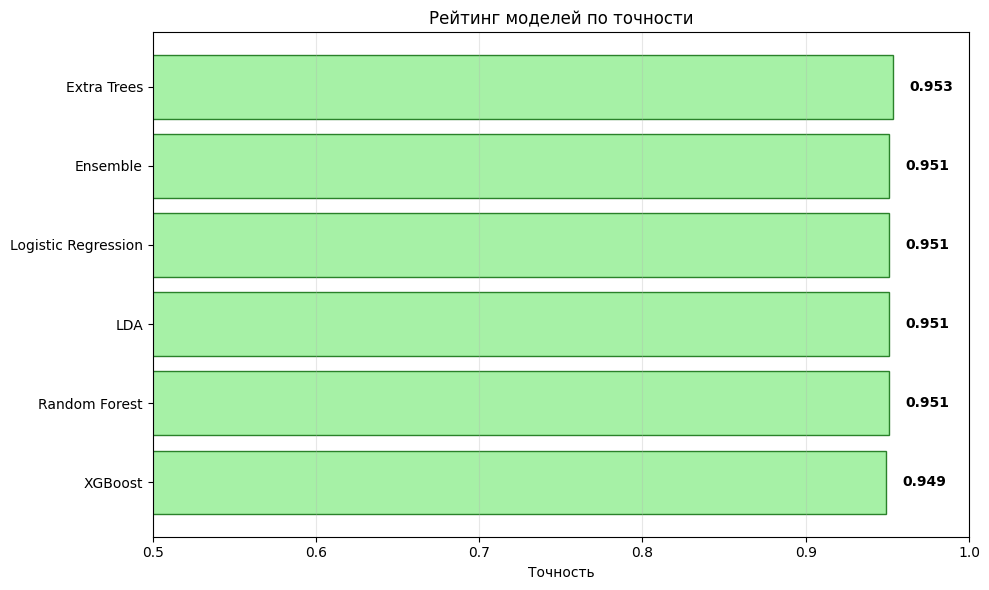

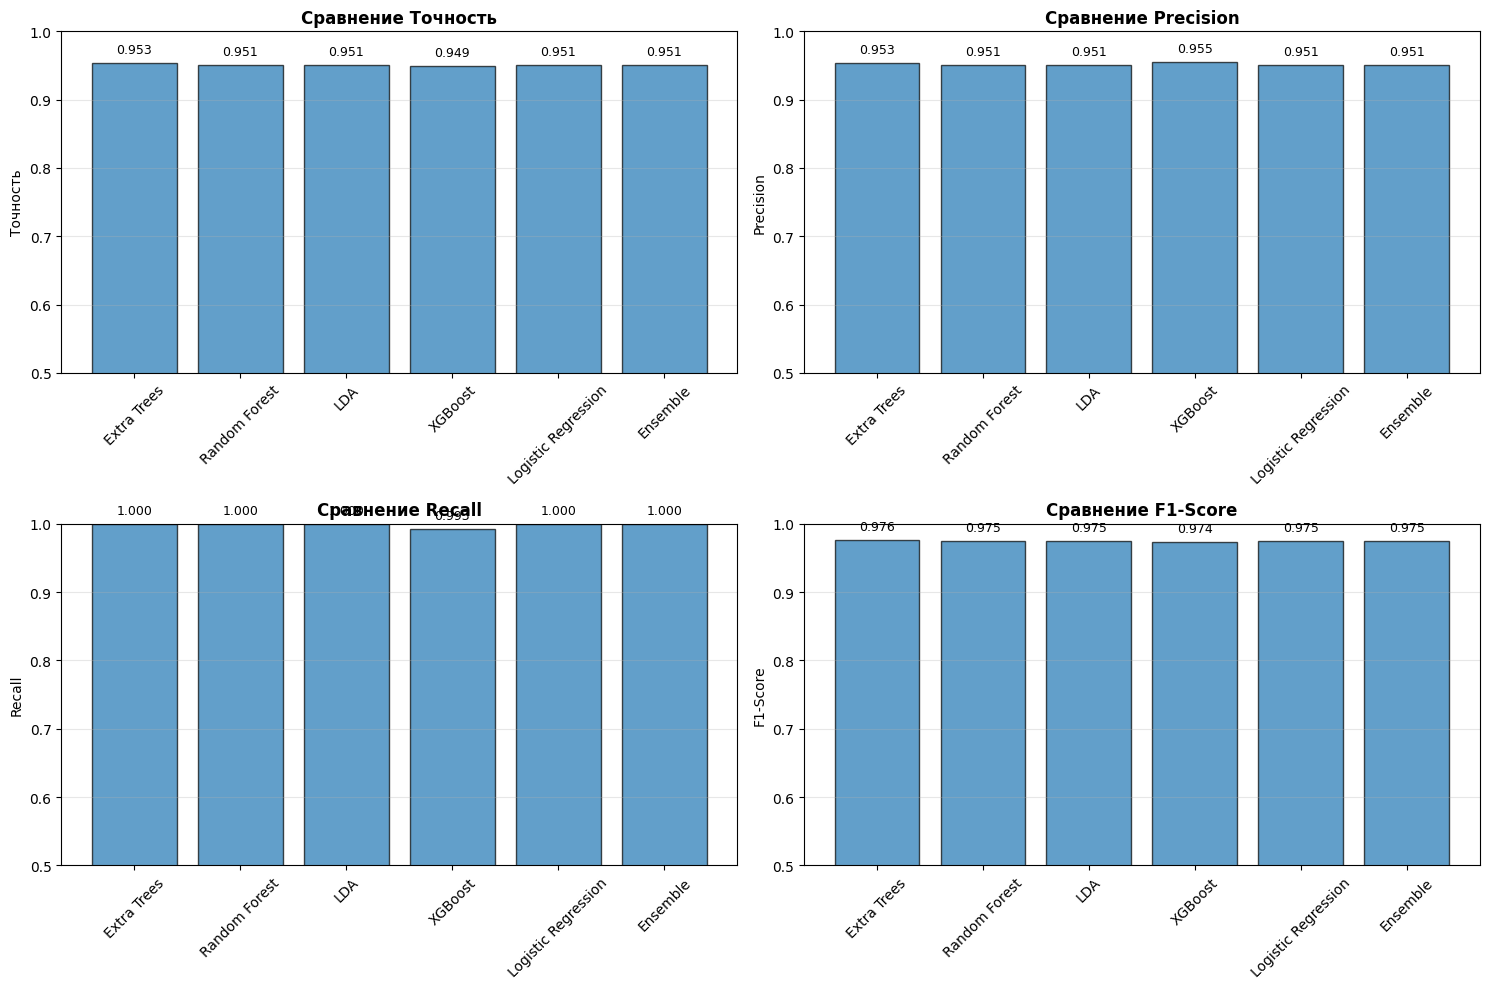

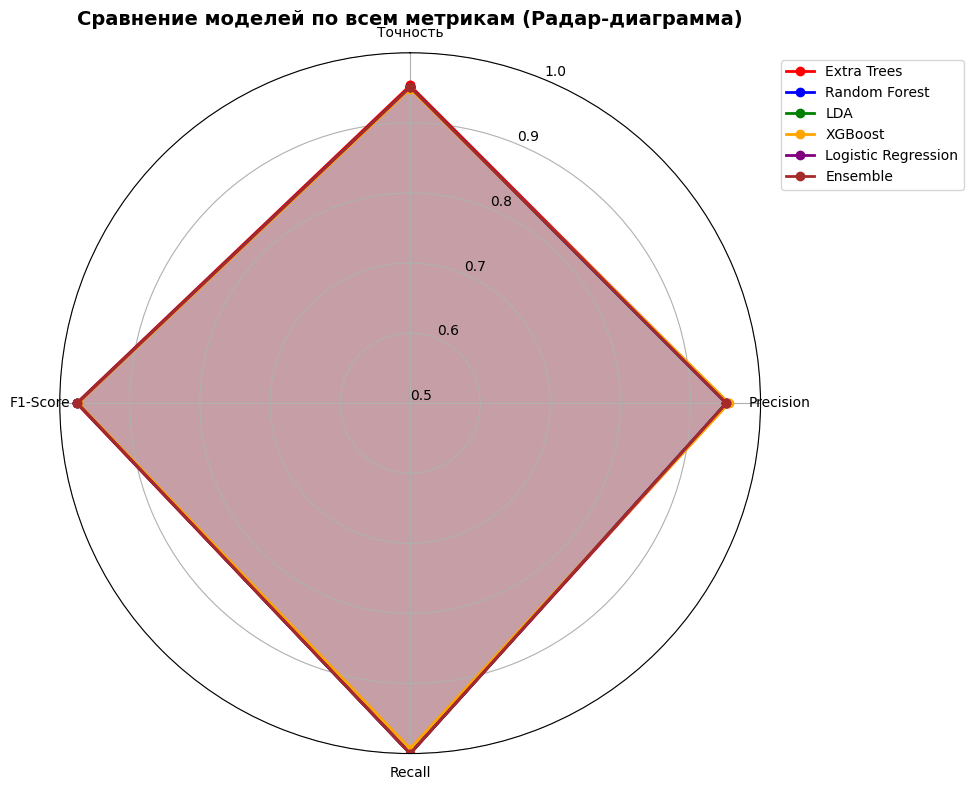

In [4]:
import classification as cl

classification_results = cl.classification(X_train, X_test, y_train, y_test)

=== ОБНАРУЖЕНИЕ АНОМАЛИЙ ===
Аномалии (Isolation Forest): 180
Аномалии (LOF): 180
Аномалии (комбинированные): 30


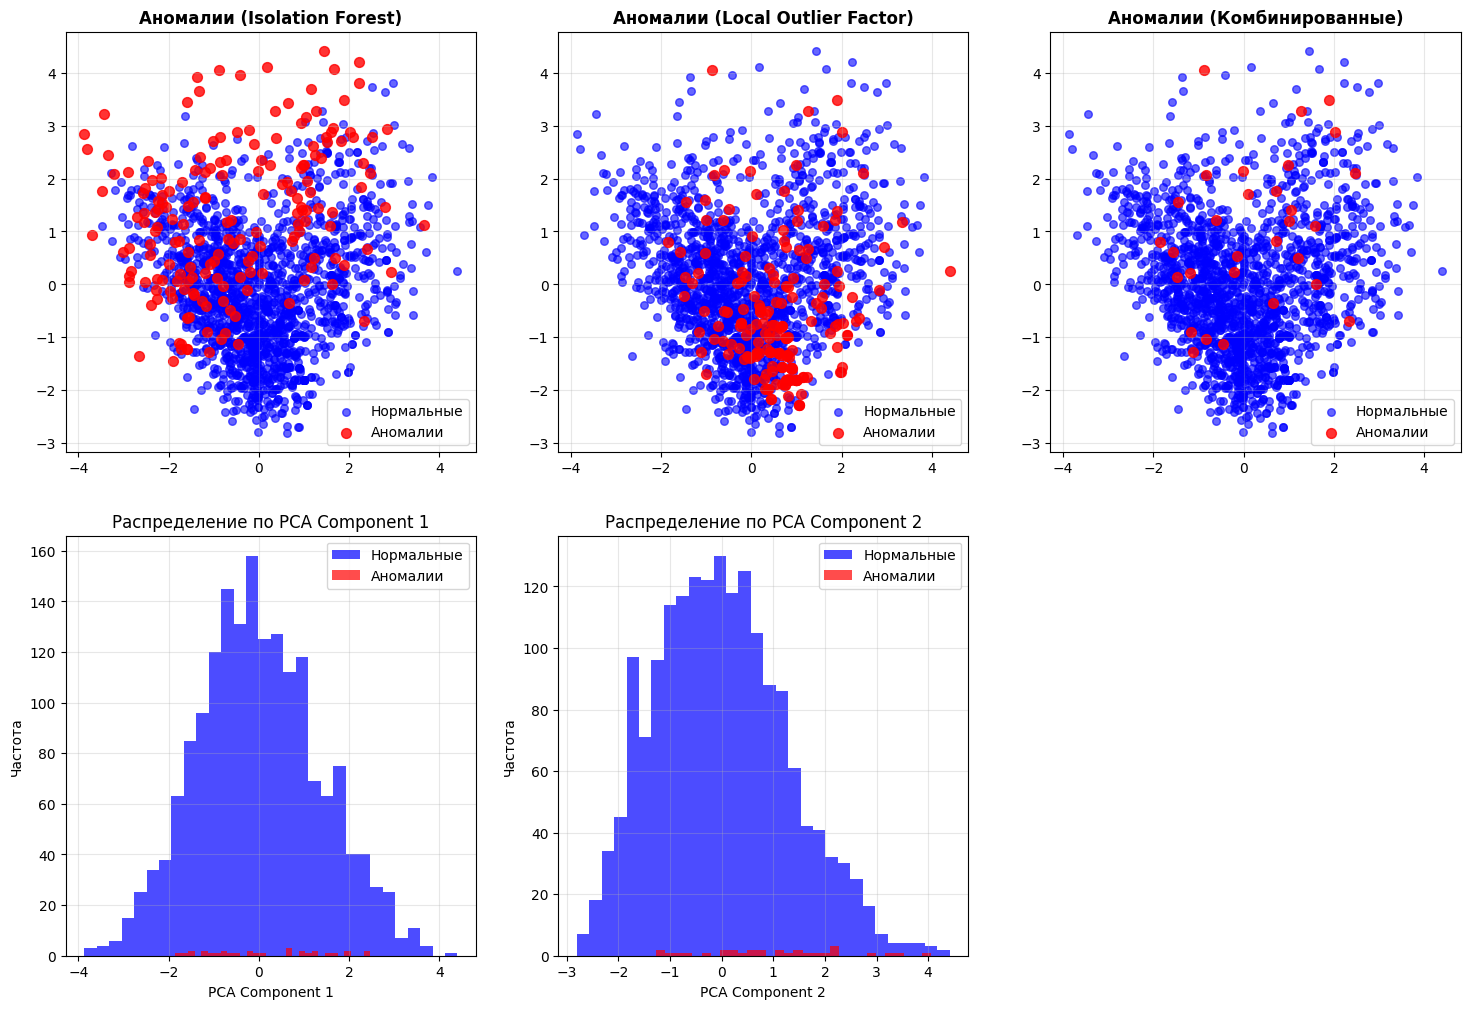

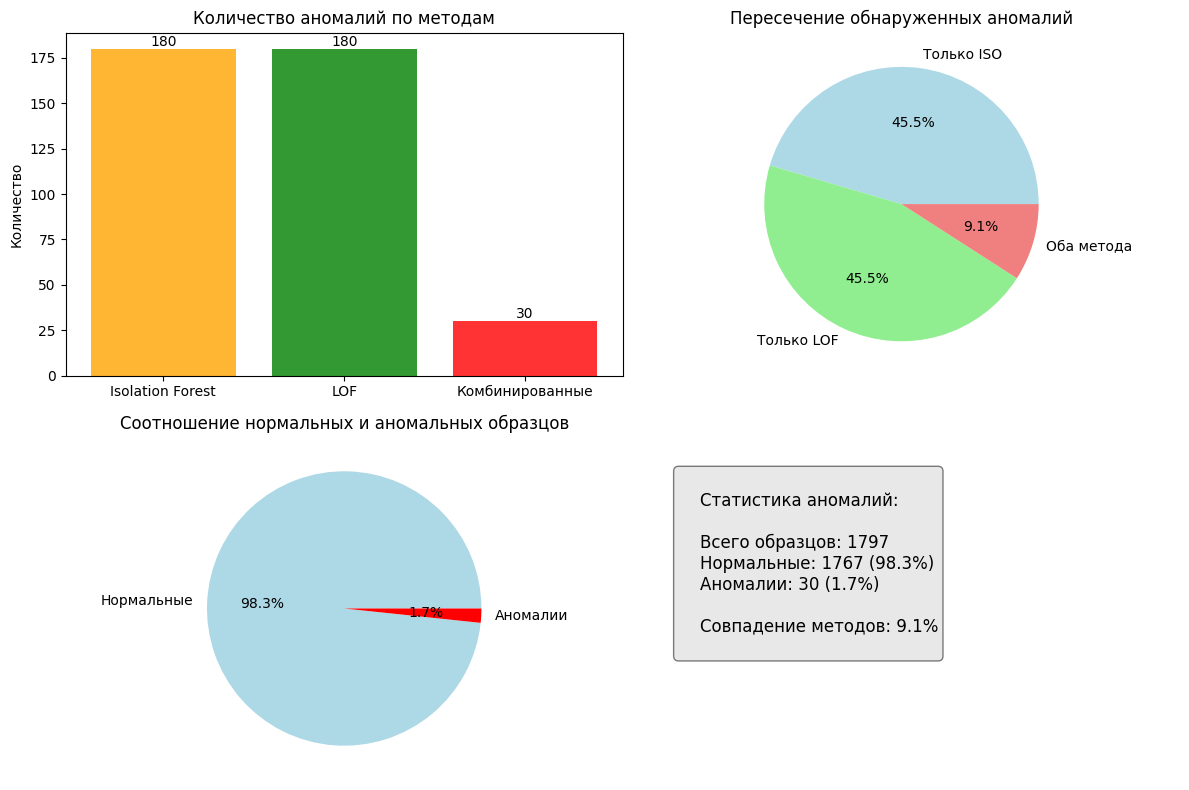

In [6]:
import anomaly as an

anomalies_iso, anomalies_lof, combined_anomalies = an.anomaly_detection(X_train)

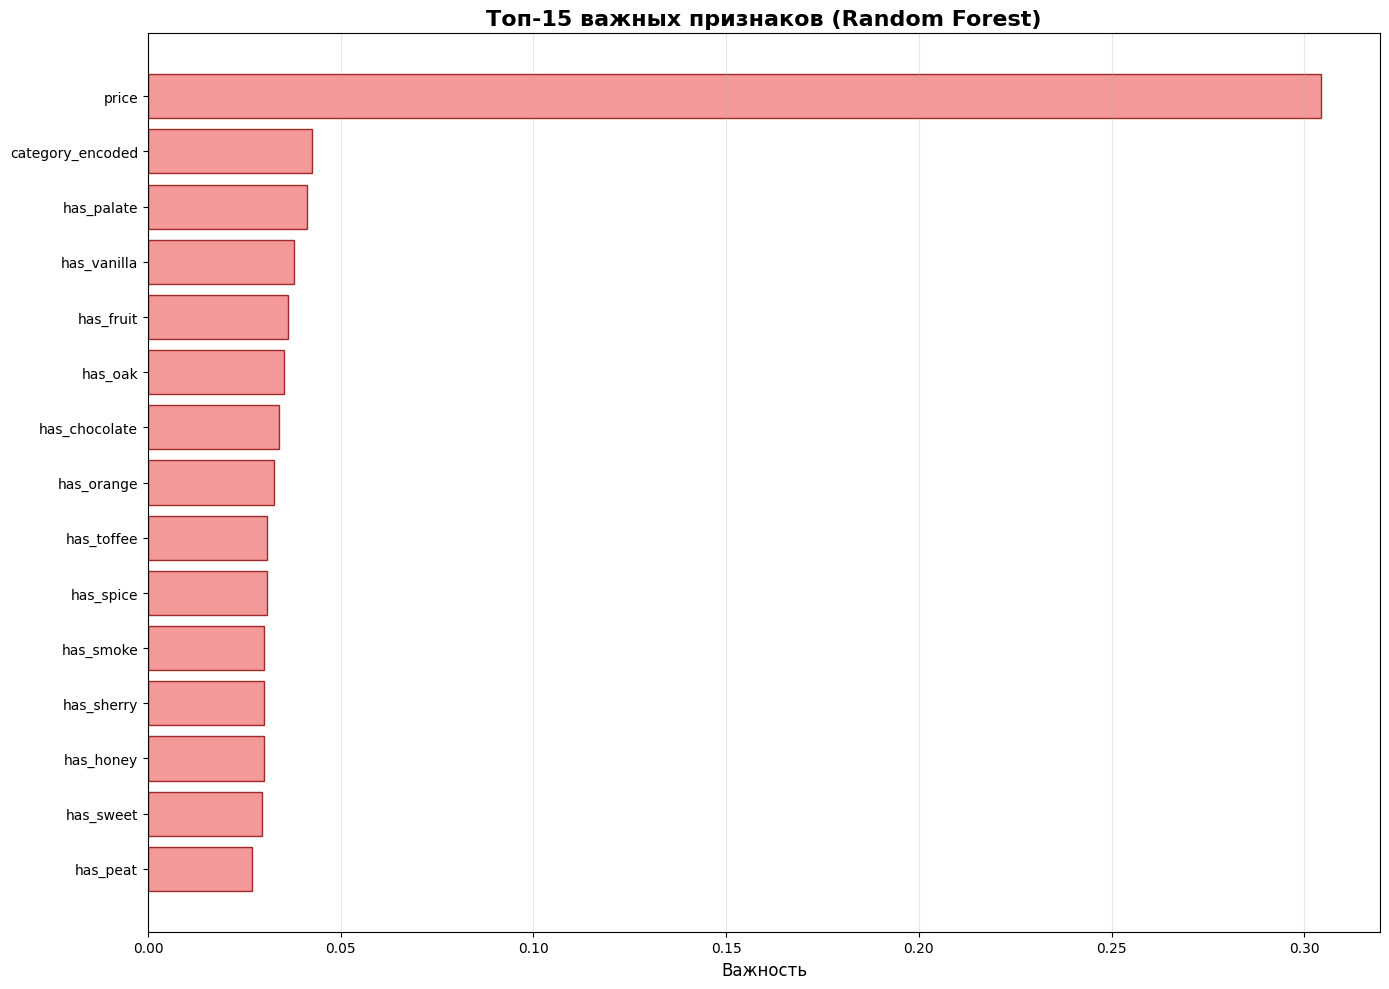

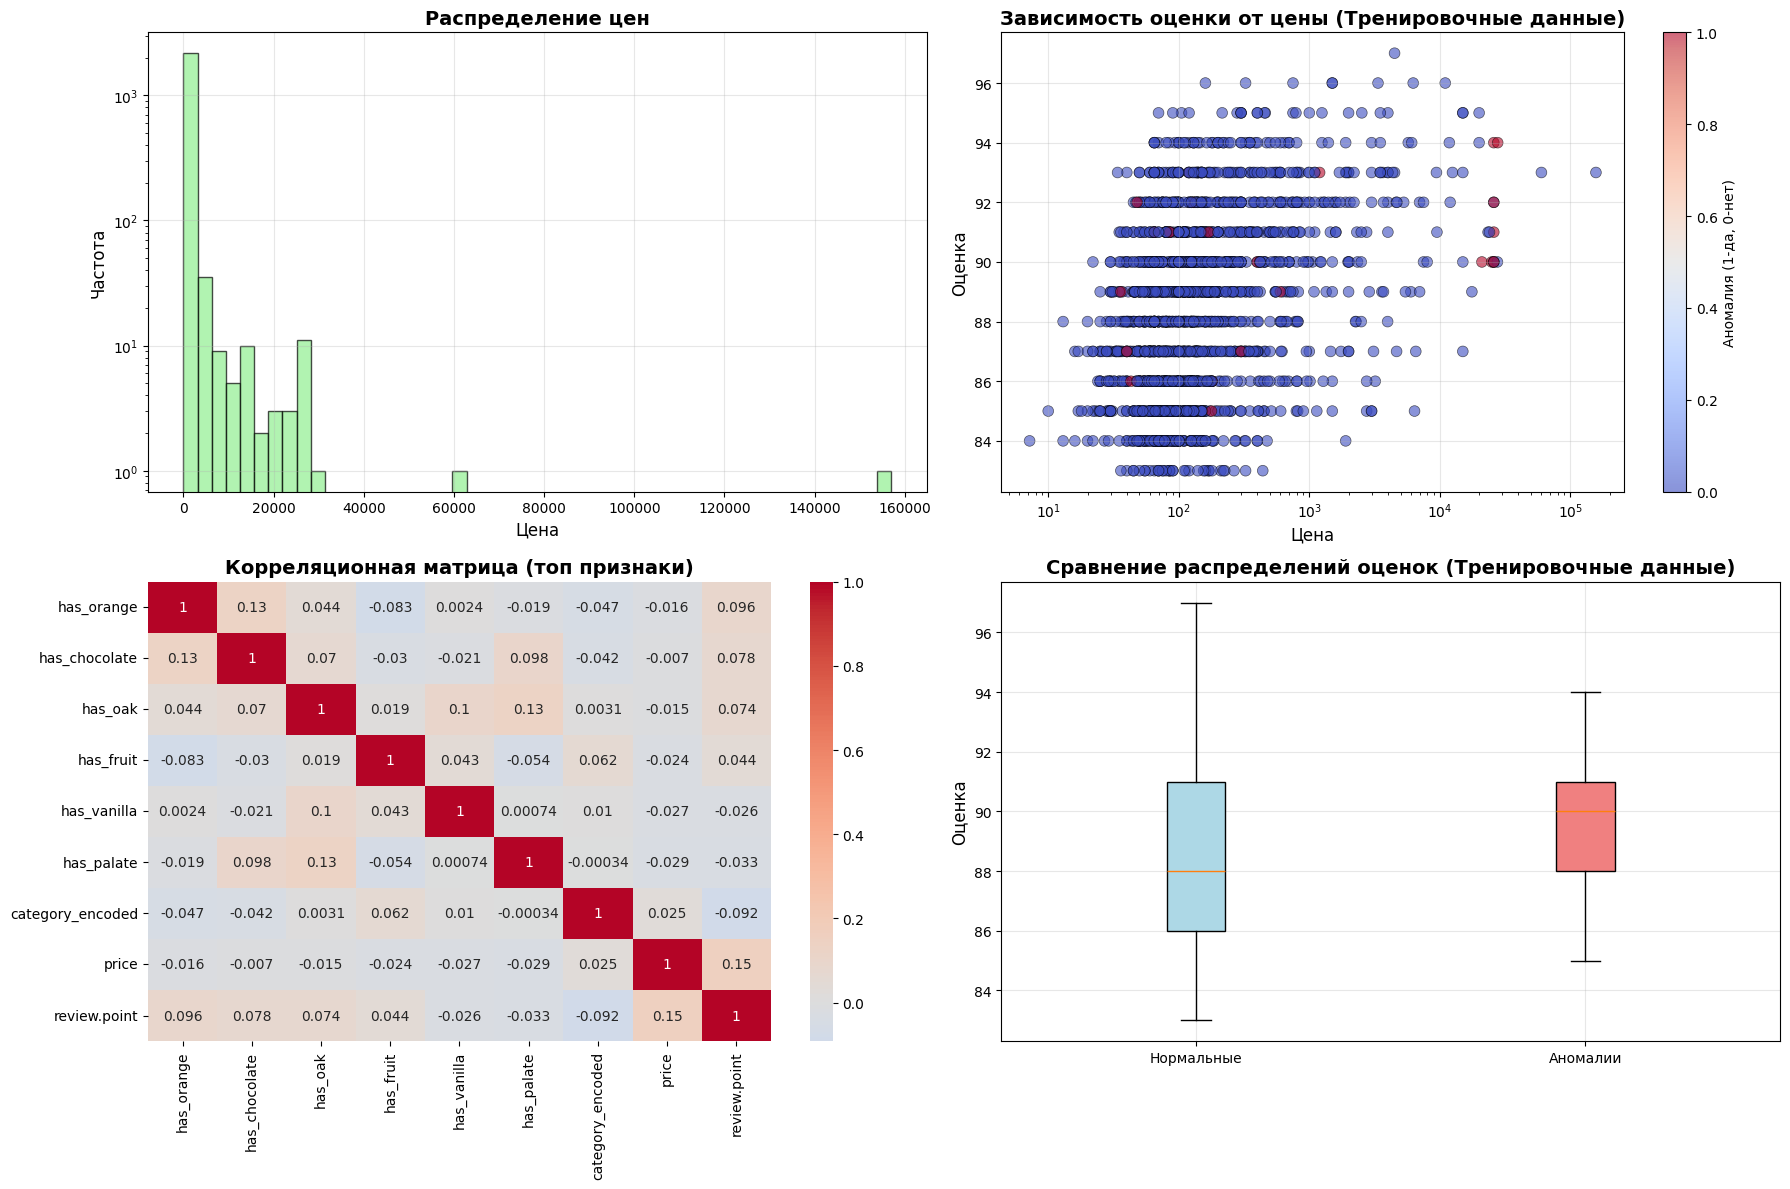

In [7]:
import visualization as vs

visual = vs.visualization(classification_results, y_test, label_encoder_y, feature_columns, X_train, anomalies_iso, anomalies_lof, combined_anomalies, df, X_train_indices)